#### DSC-630-T302
#### Chitramoy Mukherjee
#### Date : 04/04/2024
#### Week3 - Exercise 4.2 - Clustering Exercise

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Import the dataset in pandas dataframe and Display the first few rows of the dataset.

In [33]:
df = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-4\\als_data.csv')
df.head()


,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


#### Run summary statistics, Check for missing values and identify column datatypes.

In [34]:
df.dtypes

ID                   int64
Age_mean             int64
Albumin_max        float64
Albumin_median     float64
Albumin_min        float64
                    ...   
trunk_min            int64
trunk_range        float64
Urine.Ph_max       float64
Urine.Ph_median    float64
Urine.Ph_min       float64
Length: 101, dtype: object

In [35]:
print(df.isnull().sum())

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64


In [36]:
# describe the dataframe values
df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [38]:
# Step 2: Review the dataset and identify irrelevant columns
# For demonstration, let's assume 'Patient_ID', 'Hospital_ID', and 'Date_Admitted' are irrelevant
irrelevant_columns = ['ID', 'SubjectID']

# Step 3: Remove irrelevant columns
data = df.drop(columns=irrelevant_columns)

# Step 4: Save the modified dataset to a new CSV file
filtered_file_path = 'filtered_als_data.csv'
data.to_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-4\\filtered_als_data.csv', index=False)

print("Filtered data saved to:", filtered_file_path)

Filtered data saved to: filtered_als_data.csv


In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Read the CSV file
data = pd.read_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-4\\filtered_als_data.csv')

# Step 2: Apply StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Step 3: Convert scaled data back to DataFrame and save to a new CSV file
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
scaled_file_path = 'scaled_ALS_data.csv'
scaled_df.to_csv('C:\\Users\\Chitramoy\\Desktop\\MS-DSC\\DSC-630\\Week-4\\scaled_ALS_data.csv', index=False)

print("Scaled data saved to:", scaled_file_path)

Scaled data saved to: scaled_ALS_data.csv


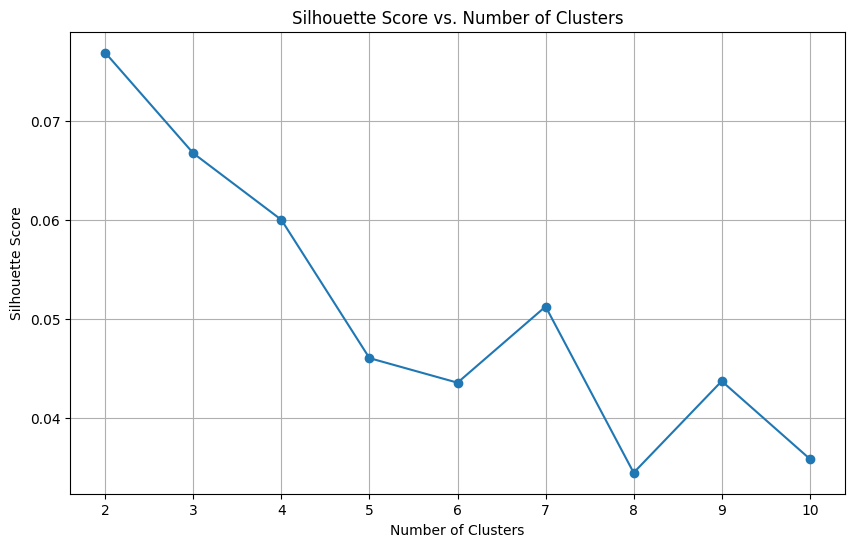

In [40]:
# Step 2: Preprocess the data (if needed)
# For clustering, it's often useful to scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Step 3 & 4: Calculate silhouette scores for different number of clusters
max_clusters = 10
silhouette_scores = []

for n_clusters in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Step 5: Plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters+1))
plt.grid(True)
plt.show()


In [26]:
# Step 6: Select the optimal number of clusters based on the plot
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_num_clusters)

Optimal number of clusters: 2


We iterate over a range of cluster numbers from 2 to max_clusters and calculate the silhouette score for each.
We plot the silhouette scores against the number of clusters.
We select the number of clusters that corresponds to the highest silhouette score as the optimal number of clusters.
We print out the optimal number of clusters.
The choice of the optimal number of clusters is justified by selecting the number of clusters where the silhouette score is highest. This indicates that the clusters have the best separation and cohesion compared to other numbers of clusters.

In [27]:
# Step 7: Fit a K-means model with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

In this code:

We load the dataset and preprocess it by scaling the data.
We calculate silhouette scores for different numbers of clusters and plot them against the number of clusters.
We choose the optimal number of clusters based on the plot.
We fit a K-means model to the data using the optimal number of clusters.
You can further analyze the clusters or use the cluster labels for different tasks.

In [29]:
from sklearn.decomposition import PCA
# Step 8: Fit a PCA transformation with two features to the scaled data
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_data)

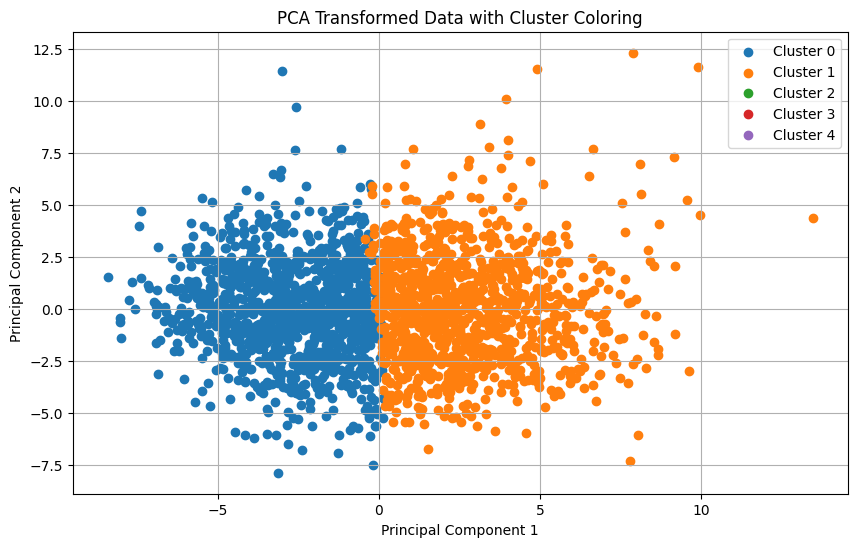

In [31]:
# Create a DataFrame with PCA features and cluster labels
pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Plot scatter plot with cluster coloring
plt.figure(figsize=(10, 6))
for cluster in range(5):  # Adjust based on the number of clusters
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('PCA Transformed Data with Cluster Coloring')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()